In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# vote classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lon_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators = [('lr',lon_clf),('rr',rnd_clf),('svc',svm_clf)],
    voting= 'hard'
)

In [27]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes['feature_names'])
print(diabetes.keys())

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [29]:
x = diabetes['data']
y = diabetes['target']
columns = diabetes['feature_names']
columns.append('target')
print(columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [38]:
x_y = np.c_[x,y]
df = pd.DataFrame(data=x_y,columns= columns)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [55]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size = 0.3,random_state =42)
print(len(df_train),len(df_test))
df_train.head()
print(len(df_train['target']))

309 133
309


In [59]:
x_train = df_train.iloc[:,:10]
x_test = df_test.iloc[:,:10]
y_train = df_train['target']
y_test = df_test['target']
print(len(x_train))
print(len(y_train))

309
309


In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
x_ir = iris['data']
y_ir = iris['target']
columns = iris['feature_names']
columns.append('target')

In [64]:
x_y_r = np.c_[x_ir,y_ir]
df = pd.DataFrame(data=x_y_r,columns= columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [96]:
df_train, df_test = train_test_split(df,test_size = 0.5,random_state =42)
print(len(df_train),len(df_test))
df_train.head()
x_train = df_train.iloc[:,2:4]
x_test = df_test.iloc[:,2:4]
y_train = df_train['target']
y_test = df_test['target']
x_train

75 75


,petal length (cm),petal width (cm)
84,4.5,1.5
148,5.4,2.3
53,4.0,1.3
5,1.7,0.4
93,3.3,1.0
...,...,...
71,4.0,1.3
106,4.5,1.7
14,1.2,0.2
92,4.0,1.2


In [97]:
voting_clf.fit(x_train.values,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rr',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [98]:
from sklearn.metrics import accuracy_score
for clf in (lon_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 1.0
RandomForestClassifier 0.9866666666666667
SVC 0.9866666666666667
VotingClassifier 0.9866666666666667


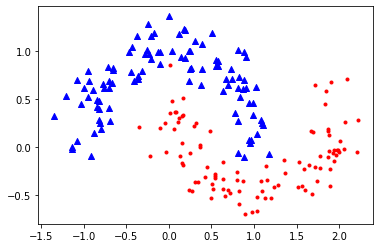

In [100]:
from sklearn.datasets import make_moons
x_m,y_m = make_moons(n_samples=200,noise=0.15,random_state=42)

def plotmoondata(x,y):
    for ii in range(len(y)):
        if y[ii] ==0 :
            plt.scatter(x[ii,0],x[ii,1],c ="blue",marker='^')
        else:
            plt.scatter(x[ii,0],x[ii,1],c ="red",marker='.')
def TreePlotMap(clf,limit):
    x1 = np.linspace(limit[0][0],limit[0][1],num = 100)
    x2 = np.linspace(limit[1][0],limit[1][1],num = 100)
    x1s,x2s = np.meshgrid(x1,x2)
    y_pred = clf.predict(np.c_[x1s.ravel(),x2s.ravel()]).reshape(x1s.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.3)

plotmoondata(x_m,y_m)

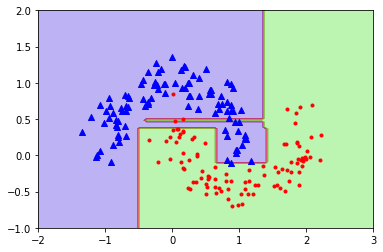

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_m,y_m)
    
TreePlotMap(tree_clf,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)

In [104]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1
)
bag_clf.fit(x_m,y_m)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


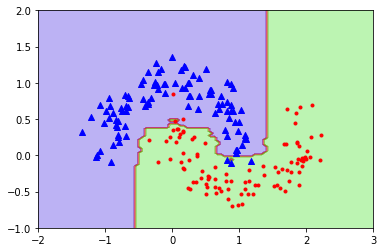

In [105]:
TreePlotMap(bag_clf,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)

# 包外评估

In [108]:
bag_clf1 = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score= True
)
bag_clf1.fit(x_m,y_m)
bag_clf1.oob_score_

0.97

# Random patches
# 随机森林

In [110]:
from sklearn.ensemble import RandomForestClassifier
rnf_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnf_clf.fit(x_m,y_m)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

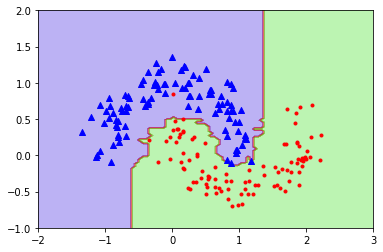

In [111]:
TreePlotMap(rnf_clf,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
exf_clf = ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
exf_clf.fit(x_m,y_m)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=16, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

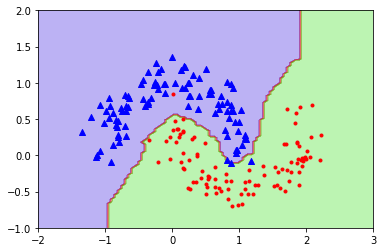

In [114]:
TreePlotMap(exf_clf,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)

# Boosting
### Adaptive Boosting
### 权重更新
$$\normalsize r_j = \frac{\sum_{i=1}^mw^{(i)}(\hat{y}_j^{(i)}\ne y^{(i)})}{\sum_{i=1}^m w^{(i)}}$$
$$\alpha_j = \eta \log\frac{1-r_j}{r_j}$$

In [115]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm="SAMME.R",learning_rate=0.5
)
ada_clf.fit(x_m,y_m)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

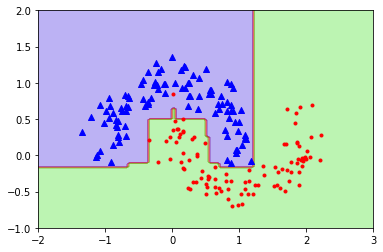

In [116]:
TreePlotMap(ada_clf,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)

# 梯度提升
### Gradient boosting 
### Gradient Boosting Regression Tree, GBRT

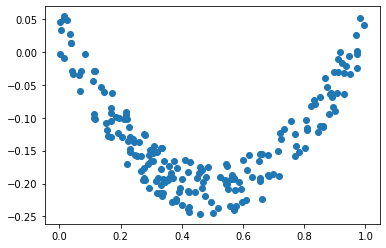

In [118]:
x_r = np.random.rand(200,1)
y_r = x_r ** 2 - x_r + np.random.rand(200,1)*0.08
plt.scatter(x_r,y_r)

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt.fit(x_r,y_r.ravel())


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

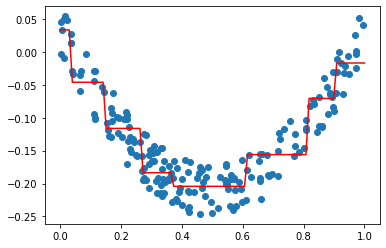

In [137]:
def TreePlotReg(reg,limit):
    x = np.linspace(limit[0],limit[1],num=100).reshape(-1, 1)
    #print(x)
    y_pred = reg.predict(x)
    plt.plot(x,y_pred,c="red")
TreePlotReg(gbrt,[0,1])       
plt.scatter(x_r,y_r)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train ,x_val,y_train,y_test= train_test_split(x_r,y_r)

In [144]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train.ravel())
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

# Stacking
## sklearn do not support